In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
accruals_df = pd.read_csv('accurals_compustat.csv')
returns_df = pd.read_csv('return.csv')

# Convert dates to datetime objects for alignment
accruals_df['datadate'] = pd.to_datetime(accruals_df['datadate'])
returns_df['date'] = pd.to_datetime(returns_df['date'])

# Convert the 'RET' column to numeric, coercing errors to NaN, then drop NaN values
returns_df['RET'] = pd.to_numeric(returns_df['RET'], errors='coerce')
returns_df.dropna(subset=['RET'], inplace=True)


In [156]:
# Calculate accruals
accruals_df['accruals'] = (accruals_df['act'] - accruals_df['che']) - (accruals_df['lct'] - accruals_df['dlc'] - accruals_df['txp'])
accruals_df['avg_total_assets'] = accruals_df['at'].rolling(window=2).mean()
accruals_df['accruals_ratio'] = accruals_df['accruals'] / accruals_df['avg_total_assets']
# Drop rows where 'accruals_ratio' is NaN
accruals_df = accruals_df.dropna(subset=['accruals_ratio'])

In [157]:
accruals_df

,gvkey,datadate,fyear,tic,cusip,conm,act,at,che,dlc,lct,txp,accruals,avg_total_assets,accruals_ratio
4,1000,1965-12-31,1965.0,AE.2,000032102,A & E PLASTIK PAK INC,0.725,2.310,0.031,0.300,0.623,0.000,0.371,1.8630,0.199141
5,1000,1966-12-31,1966.0,AE.2,000032102,A & E PLASTIK PAK INC,1.015,2.430,0.063,0.124,0.446,0.000,0.630,2.3700,0.265823
6,1000,1967-12-31,1967.0,AE.2,000032102,A & E PLASTIK PAK INC,1.004,2.456,0.029,0.086,0.376,0.000,0.685,2.4430,0.280393
7,1000,1968-12-31,1968.0,AE.2,000032102,A & E PLASTIK PAK INC,1.865,5.922,0.352,0.128,1.248,0.190,0.583,4.1890,0.139174
8,1000,1969-12-31,1969.0,AE.2,000032102,A & E PLASTIK PAK INC,17.314,28.712,1.277,7.311,13.980,1.426,10.794,17.3170,0.623318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551461,352262,2022-12-31,2022.0,CLCO,G2415A113,COOL COMPANY LTD,145.338,2058.061,132.570,180.576,278.589,0.396,-84.849,35212.2165,-0.002410
551462,353444,2021-12-31,2021.0,HLN,405552100,HALEON PLC,7110.379,46650.099,560.597,1224.107,5738.676,273.528,2308.741,24354.0800,0.094799
551463,353444,2022-12-31,2022.0,HLN,405552100,HALEON PLC,4890.689,41948.594,824.152,526.542,5265.413,253.029,-419.305,44299.3465,-0.009465
551464,353945,2021-12-31,2021.0,ACLLY,00449R109,ACCELLERON INDUSTRIES AG,436.863,686.085,73.183,102.676,326.123,28.557,168.790,21317.3395,0.007918


In [158]:
# Calculate decile ranks within each fiscal year
grouped = accruals_df.groupby(['fyear', 'gvkey'])['accruals_ratio'].sum()
deciles_df = grouped.groupby('fyear', group_keys=False).apply(lambda x: pd.qcut(x, 10, labels=False))

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4529: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [159]:
# Assign decile ranks back to the original dataframe
accruals_df = accruals_df.set_index(['fyear', 'gvkey'])
accruals_df['decile_rank'] = deciles_df

In [160]:
accruals_df

,,datadate,tic,cusip,conm,act,at,che,dlc,lct,txp,accruals,avg_total_assets,accruals_ratio,decile_rank
fyear,gvkey,,,,,,,,,,,,,,
1965.0,1000,1965-12-31,AE.2,000032102,A & E PLASTIK PAK INC,0.725,2.310,0.031,0.300,0.623,0.000,0.371,1.8630,0.199141,4.0
1966.0,1000,1966-12-31,AE.2,000032102,A & E PLASTIK PAK INC,1.015,2.430,0.063,0.124,0.446,0.000,0.630,2.3700,0.265823,5.0
1967.0,1000,1967-12-31,AE.2,000032102,A & E PLASTIK PAK INC,1.004,2.456,0.029,0.086,0.376,0.000,0.685,2.4430,0.280393,5.0
1968.0,1000,1968-12-31,AE.2,000032102,A & E PLASTIK PAK INC,1.865,5.922,0.352,0.128,1.248,0.190,0.583,4.1890,0.139174,3.0
1969.0,1000,1969-12-31,AE.2,000032102,A & E PLASTIK PAK INC,17.314,28.712,1.277,7.311,13.980,1.426,10.794,17.3170,0.623318,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022.0,352262,2022-12-31,CLCO,G2415A113,COOL COMPANY LTD,145.338,2058.061,132.570,180.576,278.589,0.396,-84.849,35212.2165,-0.002410,4.0
2021.0,353444,2021-12-31,HLN,405552100,HALEON PLC,7110.379,46650.099,560.597,1224.107,5738.676,273.528,2308.741,24354.0800,0.094799,7.0
2022.0,353444,2022-12-31,HLN,405552100,HALEON PLC,4890.689,41948.594,824.152,526.542,5265.413,253.029,-419.305,44299.3465,-0.009465,4.0


In [161]:
# Identify top and bottom deciles and assign weights
accruals_df.reset_index(inplace=True)  # Reset the index to allow for easy merging later
accruals_df['weight'] = 0
accruals_df.loc[accruals_df['decile_rank'] == 9, 'weight'] = 1
accruals_df.loc[accruals_df['decile_rank'] == 0, 'weight'] = -1

In [162]:
accruals_df

,fyear,gvkey,datadate,tic,cusip,conm,act,at,che,dlc,lct,txp,accruals,avg_total_assets,accruals_ratio,decile_rank,weight
0,1965.0,1000,1965-12-31,AE.2,000032102,A & E PLASTIK PAK INC,0.725,2.310,0.031,0.300,0.623,0.000,0.371,1.8630,0.199141,4.0,0
1,1966.0,1000,1966-12-31,AE.2,000032102,A & E PLASTIK PAK INC,1.015,2.430,0.063,0.124,0.446,0.000,0.630,2.3700,0.265823,5.0,0
2,1967.0,1000,1967-12-31,AE.2,000032102,A & E PLASTIK PAK INC,1.004,2.456,0.029,0.086,0.376,0.000,0.685,2.4430,0.280393,5.0,0
3,1968.0,1000,1968-12-31,AE.2,000032102,A & E PLASTIK PAK INC,1.865,5.922,0.352,0.128,1.248,0.190,0.583,4.1890,0.139174,3.0,0
4,1969.0,1000,1969-12-31,AE.2,000032102,A & E PLASTIK PAK INC,17.314,28.712,1.277,7.311,13.980,1.426,10.794,17.3170,0.623318,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367336,2022.0,352262,2022-12-31,CLCO,G2415A113,COOL COMPANY LTD,145.338,2058.061,132.570,180.576,278.589,0.396,-84.849,35212.2165,-0.002410,4.0,0
367337,2021.0,353444,2021-12-31,HLN,405552100,HALEON PLC,7110.379,46650.099,560.597,1224.107,5738.676,273.528,2308.741,24354.0800,0.094799,7.0,0
367338,2022.0,353444,2022-12-31,HLN,405552100,HALEON PLC,4890.689,41948.594,824.152,526.542,5265.413,253.029,-419.305,44299.3465,-0.009465,4.0,0
367339,2021.0,353945,2021-12-31,ACLLY,00449R109,ACCELLERON INDUSTRIES AG,436.863,686.085,73.183,102.676,326.123,28.557,168.790,21317.3395,0.007918,5.0,0


In [163]:
returns_df

,PERMNO,date,cusip,RET
2,10000,1986-02-28,68391610,-0.257143
3,10000,1986-03-31,68391610,0.365385
4,10000,1986-04-30,68391610,-0.098592
5,10000,1986-05-30,68391610,-0.222656
6,10000,1986-06-30,68391610,-0.005025
...,...,...,...,...
1048570,23473,2003-11-28,17206210,-0.007559
1048571,23473,2003-12-31,17206210,0.031941
1048572,23473,2004-01-30,17206210,0.037605
1048573,23473,2004-02-27,17206210,0.038781


In [164]:
# Convert the 'RET' column to numeric, coercing errors to NaN, then drop NaN values
returns_df['RET'] = pd.to_numeric(returns_df['RET'], errors='coerce')
returns_df.dropna(subset=['RET'], inplace=True)

# Group the data by 'PERMNO', 'cusip', and year, and then calculate the compounded annual return
annual_returns = returns_df.groupby(['PERMNO', 'cusip', returns_df['date'].dt.year])['RET'].apply(lambda x: (x + 1).prod() - 1).reset_index()

# Rename the columns for clarity
annual_returns.rename(columns={'date': 'year', 'RET': 'annual_RET'}, inplace=True)

In [165]:
annual_returns

,PERMNO,cusip,year,annual_RET
0,10000,68391610,1986,-0.882143
1,10000,68391610,1987,-0.575757
2,10001,36720410,1986,0.217369
3,10001,36720410,1987,-0.101275
4,10001,36720410,1988,0.163160
...,...,...,...,...
91779,23473,17206210,2000,0.295705
91780,23473,17206210,2001,-0.014900
91781,23473,17206210,2002,0.006164
91782,23473,17206210,2003,0.141174


In [166]:
# Adjust the cusip in accruals_df to match the format in annual_returns by removing the last character
accruals_df['cusip'] = accruals_df['cusip'].str[:-1]

# Merge the adjusted accruals_df and annual_returns on cusip and year
weighted_annual_returns_df = pd.merge(annual_returns, accruals_df, how='left', left_on=['cusip', 'year'], right_on=['cusip', 'fyear'])

# Calculate weighted returns
weighted_annual_returns_df['weighted_annual_RET'] = weighted_annual_returns_df['annual_RET'] * weighted_annual_returns_df['weight']

In [167]:
weighted_annual_returns_df['weighted_annual_RET'].count()

34223

In [168]:
weighted_annual_returns_df

,PERMNO,cusip,year,annual_RET,fyear,gvkey,datadate,tic,conm,act,...,che,dlc,lct,txp,accruals,avg_total_assets,accruals_ratio,decile_rank,weight,weighted_annual_RET
0,10000,68391610,1986,-0.882143,1986.0,13007.0,1986-10-31,OMFGA,OPTIMUM MANUFACTURING -CL A,1.630,...,0.348,0.968,1.639,0.000,0.611,1.4175,0.431041,8.0,0.0,-0.0
1,10000,68391610,1987,-0.575757,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,36720410,1986,0.217369,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,36720410,1987,-0.101275,1987.0,12994.0,1987-06-30,EGAS,GAS NATURAL INC,1.870,...,0.729,0.377,1.983,0.000,-0.465,12.0065,-0.038729,1.0,0.0,-0.0
4,10001,36720410,1988,0.163160,1988.0,12994.0,1988-06-30,EGAS,GAS NATURAL INC,1.987,...,0.744,0.325,1.894,0.213,-0.113,11.7530,-0.009615,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91779,23473,17206210,2000,0.295705,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91780,23473,17206210,2001,-0.014900,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91781,23473,17206210,2002,0.006164,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91782,23473,17206210,2003,0.141174,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


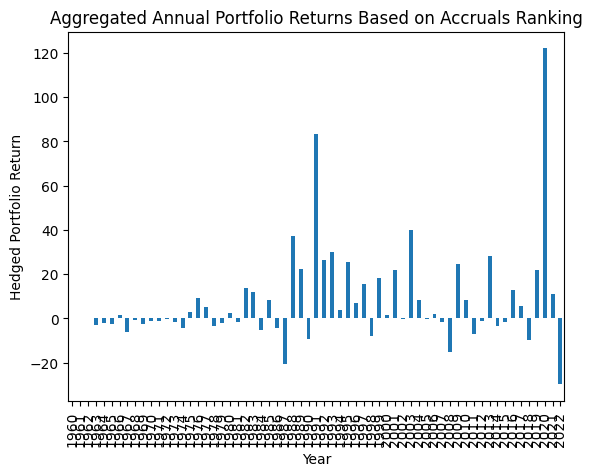

In [170]:
# Aggregate the weighted returns by year
annual_aggregated_returns = weighted_annual_returns_df.groupby('year')['weighted_annual_RET'].sum()

# Plot the aggregated annual returns
annual_aggregated_returns.plot(kind='bar')
plt.title('Aggregated Annual Portfolio Returns Based on Accruals Ranking')
plt.xlabel('Year')
plt.ylabel('Hedged Portfolio Return')
plt.show()